In [2]:
# Dependencies
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')

/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [3]:
# get the stock quote
TGT_df = web.DataReader('TGT', data_source='yahoo', start='2000-01-01', end ='2021-12-31')
TGT_df

High         Low        Open       Close      Volume  \
Date                                                                     
2000-01-03   36.375000   35.125000   36.125000   36.031250   2870400.0   
2000-01-04   35.343750   34.312500   34.750000   34.468750   3856400.0   
2000-01-05   34.968750   33.500000   34.468750   33.687500   4330600.0   
2000-01-06   33.125000   31.843750   33.000000   32.093750   8167400.0   
2000-01-07   33.843750   31.906250   32.000000   33.750000   4402600.0   
2000-01-10   33.750000   32.781250   33.250000   33.093750   2559600.0   
2000-01-11   34.250000   33.000000   33.031250   34.093750   3790400.0   
2000-01-12   34.375000   33.562500   34.156250   33.718750   3191400.0   
2000-01-13   35.000000   34.218750   34.562500   34.500000   5080200.0   
2000-01-14   35.218750   34.437500   35.000000   34.625000   2916600.0   
2000-01-18   34.250000   33.625000   33.750000   34.000000   1939200.0   
2000-01-19   35.906250   33.500000   34.031250   34.968750   3417000.0   
2000-01-20   35.093750   33.500000   34.968750   33.843750   3005400.0   
2000-01-21   34.500000   32.250000   34.375000   32.406250   5370200.0   
2000-01-24   33.125000   31.625000   32.750000   31.750000   5629400.0   
2000-01-25   32.718750   31.437500   32.250000   32.562500   4761400.0   
2000-01-26   34.250000   32.500000   32.500000   34.062500   5087000.0   
2000-01-27   34.000000   32.906250   33.968750   33.656250   4697200.0   
2000-01-28   33.718750   31.500000   33.718750   31.687500   4666800.0   
2000-01-31   33.125000   31.687500   31.875000   32.937500   3084800.0   
2000-02-01   34.062500   32.562500   33.000000   33.718750   2733200.0   
2000-02-02   34.562500   33.031250   33.750000   34.000000   3095800.0   
2000-02-03   33.875000   32.812500   33.875000   33.031250   4748800.0   
2000-02-04   33.750000   31.875000   33.468750   32.312500   4543600.0   
2000-02-07   33.250000   32.312500   32.500000   32.843750   2819400.0   
2000-02-08   34.375000   32.812500   32.843750   34.343750   3512200.0   
2000-02-09   34.343750   33.500000   34.343750   33.593750   2085400.0   
2000-02-10   34.125000   33.062500   33.656250   33.218750   1900000.0   
2000-02-11   33.437500   33.031250   33.281250   33.031250   2102400.0   
2000-02-14   33.062500   32.187500   33.062500   32.625000   1876800.0   
...                ...         ...         ...         ...         ...   
2021-01-25  193.110001  189.229996  191.559998  190.149994   3423900.0   
2021-01-26  190.559998  186.669998  190.110001  187.699997   3463600.0   
2021-01-27  187.699997  176.820007  187.610001  178.279999   6985900.0   
2021-01-28  185.419998  177.759995  177.929993  183.580002   3965200.0   
2021-01-29  183.500000  180.259995  182.119995  181.169998   3591900.0   
2021-02-01  185.000000  179.679993  182.179993  183.570007   2637300.0   
2021-02-02  189.039993  185.179993  185.500000  185.589996   2920500.0   
2021-02-03  186.929993  183.699997  185.190002  185.110001   2135400.0   
2021-02-04  188.740005  184.550003  185.869995  188.589996   2309500.0   
2021-02-05  190.330002  187.889999  189.490005  188.860001   2218600.0   
2021-02-08  194.479996  190.490005  192.339996  193.949997   3076400.0   
2021-02-09  196.250000  193.889999  194.130005  194.289993   2868600.0   
2021-02-10  194.449997  190.119995  193.889999  192.440002   2713500.0   
2021-02-11  193.169998  190.339996  192.039993  190.410004   1861800.0   
2021-02-12  191.869995  190.199997  191.050003  191.429993   1821500.0   
2021-02-16  192.580002  190.149994  191.139999  190.589996   2500300.0   
2021-02-17  194.220001  189.100006  189.199997  193.600006   3459300.0   
2021-02-18  191.559998  188.000000  188.270004  191.410004   2983500.0   
2021-02-19  192.449997  188.360001  191.949997  188.820007   3120100.0   
2021-02-22  190.410004  187.619995  188.119995  188.990005   2152600.0   
2021-02-23  188.729996  184.110001  188.089996  186.360001   2828100.0   
2021-02-24  187.729996

In [4]:
# get the total rows and columns in the AAPL Dataset
TGT_df.shape

(5328, 6)

In [5]:
# create a closing price dataset
Closing_Price_TGT_df = TGT_df.filter(['Close'])

# convert the the closing price dataset to a array
Closing_Price_array_TGT_df = Closing_Price_TGT_df.values

Closing_Price_array_TGT_df

array([[ 36.03125   ],
       [ 34.46875   ],
       [ 33.6875    ],
       ...,
       [169.82000732],
       [172.61000061],
       [176.86999512]])

In [6]:
# get the number of rows to train the model on (90 %)
train_closing_price_TGT_len = math.ceil(len(Closing_Price_array_TGT_df) * 0.9) # rounded up

train_closing_price_TGT_len

4796

In [7]:
# Scale de closing price dataset between 0 and 1
scale_TGT = MinMaxScaler(feature_range=(0,1))
scaled_closing_price_TGT_df = scale_TGT.fit_transform(Closing_Price_array_TGT_df)
scaled_closing_price_TGT_df

array([[0.07531188],
       [0.06645166],
       [0.06202155],
       ...,
       [0.83396656],
       [0.84978733],
       [0.8739438 ]])

In [11]:
# Training Data
train_closing_price_TGT = scaled_closing_price_TGT_df[0:train_closing_price_TGT_len, :]
# Split Data
x_train =[]
y_train=[]

for i in range(80, len(train_closing_price_TGT)):
  x_train.append(train_closing_price_TGT[i-80:i,0])
  y_train.append(train_closing_price_TGT[i,0])


In [12]:
# convert to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [13]:
# Reshape the dataset
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [14]:
x_train.shape

(4716, 80, 1)

In [15]:
# Building the LSTM model
#x_train = tf.convert_to_tensor(x_train)
#y_train = tf.convert_to_tensor(y_train)

TGT_model = Sequential()
TGT_model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
TGT_model.add(LSTM(50, return_sequences=False))
TGT_model.add(Dense(25))
TGT_model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# Compile  the LSTM model
TGT_model.compile(optimizer='adam', loss='mean_squared_error')
#'categorical_crossentropy'

In [18]:
# training the AAPL_model
TGT_model.fit(x_train,y_train,epochs=1,batch_size=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
4716/4716 [==============================] - 958s 203ms/step - loss: 2.2906e-04


In [20]:
# Setting the testing Dataset
# scaled testing dataset set from index 1743 to 2003
TGT_test_dataset= scaled_closing_price_TGT_df[train_closing_price_TGT_len - 80: , :]

#setting the x and y test data
x_test = []
y_test = Closing_Price_array_TGT_df[train_closing_price_TGT_len, :]
for i in range(80,len(TGT_test_dataset)):
    x_test.append(TGT_test_dataset[i-80:i, 0])


In [21]:
# Convert the test dataset to array
x_test = np.array(x_test)
print (x_test)

[[0.37266798 0.36217749 0.35849163 ... 0.26974765 0.27139211 0.28148567]
 [0.36217749 0.35849163 0.35208389 ... 0.27139211 0.28148567 0.27995464]
 [0.35849163 0.35208389 0.35026932 ... 0.28148567 0.27995464 0.27757298]
 ...
 [0.77051319 0.78678761 0.74941876 ... 0.9262262  0.85477743 0.85545787]
 [0.78678761 0.74941876 0.7673377  ... 0.85477743 0.85545787 0.83396656]
 [0.74941876 0.7673377  0.77652395 ... 0.85545787 0.83396656 0.84978733]]


In [22]:
#reshape the test dataset

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [23]:
x_test.shape

(532, 80, 1)

In [24]:
# getting the model predicted closing price value

predictions = TGT_model.predict(x_test)
predictions = scale_TGT.inverse_transform(predictions)

In [25]:
# getting the root mean squared error 

rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

41.780627573343146

/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


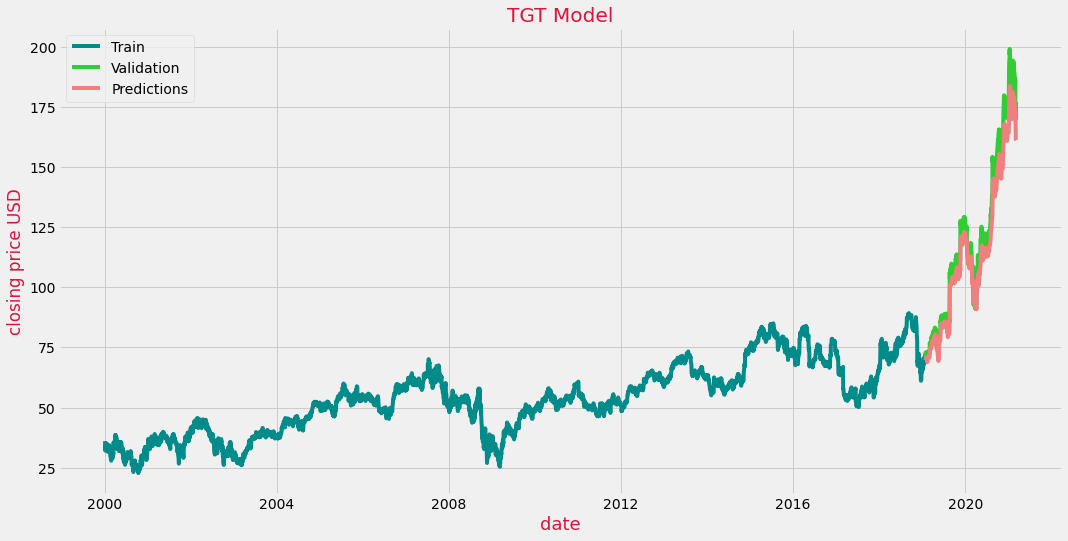

In [26]:
# Plot the Dataset
train_data = Closing_Price_TGT_df[:train_closing_price_TGT_len]
validation_data = Closing_Price_TGT_df[train_closing_price_TGT_len:]

validation_data['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('TGT Model', color='crimson')
plt.xlabel('date', fontsize=18, color='crimson')
plt.ylabel('closing price USD', color='crimson')
plt.plot(train_data['Close'], color='darkcyan')
plt.plot(validation_data['Close'], color='limegreen')
plt.plot(validation_data['Predictions'], color = 'lightcoral')
plt.legend(['Train', 'Validation', 'Predictions'])
